In [21]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

In [20]:
!pip install -r requirements_map.txt

     |████████████████████████████████| 94 kB 2.1 MB/s eta 0:00:011
     |████████████████████████████████| 1.1 MB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 30.0 MB/s eta 0:00:01
     |████████████████████████████████| 83 kB 5.0 MB/s  eta 0:00:01
     |████████████████████████████████| 1.8 MB 28.4 MB/s eta 0:00:01
     |████████████████████████████████| 421 kB 32.7 MB/s eta 0:00:01


  Created wheel for dash: filename=dash-1.21.0-py3-none-any.whl size=1100477 sha256=2395e991abe1ea2e41c1e9eba6a20689974ba32eb1e73166e5d48edccd19176f
  Stored in directory: /Users/stephaniejung/Library/Caches/pip/wheels/56/e4/21/8a1190a7c31f3aa3f8834b05126ded8bf105b8fd11fad1806e
  Created wheel for dash-core-components: filename=dash_core_components-1.17.1-py3-none-any.whl size=3738982 sha256=2499d06f887661bc4a1874a3ac012159d5b8ba9b4296dc6a70c59f5bc9f5cbba
  Stored in directory: /Users/stephaniejung/Library/Caches/pip/wheels/08/ae/6a/0f4a0ee8fa216ebf1f2e57277693a20d80e8a2cfe549f66d86
  Created wheel for dash-html-components: filename=dash_html_components-1.1.4-py3-none-any.whl size=319751 sha256=a5ee5300d5210fe060aa32a5863c231fcbf645cf7be3c33fe0caee77727d8e26
  Stored in directory: /Users/stephaniejung/Library/Caches/pip/wheels/12/fe/5a/d0f2f657ee34cef5cc3fced1d8992994fac1ca6232a03c6c03
  Created wheel for dash-table: filename=dash_table-4.12.0-py3-none-any.whl size=1837669 sha256=48ae6

In [2]:
df_pop = pd.read_csv('censuspop_2010to2018.csv')
N=6
df_pop = df_pop.iloc[:-N , :]
df_pop = df_pop.iloc[5: , :]
df_pop= df_pop.rename(columns={'Unnamed: 0': 'state'})
df_pop

,state,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
5,.Alabama,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
6,.Alaska,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
7,.Arizona,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
8,.Arkansas,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
9,.California,37319502.0,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0
10,.Colorado,5047349.0,5121108.0,5192647.0,5269035.0,5350101.0,5450623.0,5539215.0,5611885.0,5691287.0,5758736.0
11,.Connecticut,3579114.0,3588283.0,3594547.0,3594841.0,3594524.0,3587122.0,3578141.0,3573297.0,3571520.0,3565287.0
12,.Delaware,899593.0,907381.0,915179.0,923576.0,932487.0,941252.0,948921.0,956823.0,965479.0,973764.0
13,.District of Columbia,605226.0,619800.0,634924.0,650581.0,662328.0,675400.0,685815.0,694906.0,701547.0,705749.0
14,.Florida,18845537.0,19053237.0,19297822.0,19545621.0,19845911.0,20209042.0,20613477.0,20963613.0,21244317.0,21477737.0


In [63]:
df = pd.read_csv('CLEAN_GVA.csv')
df

,incident_id,age,type,gender,status,gun_stolen,gun_type,date,state,city,number_guns,total_killed,total_injured,year
0,92114,NaN,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Lexington,NaN,0,1,2014
1,92117,22.0,Victim,Male,Injured,Unknown,Unknown,2014-01-01,Kentucky,Cynthiana,1.0,0,1,2014
2,92117,NaN,Subject-Suspect,Male,"Unharmed, Arrested",NaN,NaN,2014-01-01,Kentucky,Cynthiana,1.0,0,1,2014
3,92119,NaN,Victim,Male,Injured,NaN,NaN,2014-01-01,Kentucky,Louisville,NaN,0,1,2014
4,92122,NaN,Victim,NaN,Unharmed,NaN,NaN,2014-01-01,Virginia,Falls Church,NaN,0,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449782,1083457,NaN,Victim,Male,Injured,Unknown,Unknown,2018-03-22,District of Columbia,Washington,1.0,0,1,2018
449783,1083457,NaN,Subject-Suspect,Male,Unharmed,NaN,NaN,2018-03-22,District of Columbia,Washington,1.0,0,1,2018
449784,1083466,NaN,Subject-Suspect,NaN,NaN,Unknown,Unknown,2018-03-29,Ohio,Wickliffe,1.0,0,0,2018
449785,1083472,23.0,Subject-Suspect,Male,"Unharmed, Arrested",Unknown,9mm,2018-03-31,Delaware,Townsend,2.0,0,0,2018


In [69]:
df['date']=pd.to_datetime(df['date'])
month=df["date"].dt.to_period(freq ="M")
df["month"]=month

In [3]:
state_clean=df_pop["state"].str.split(pat= ".", expand=True) 
state_clean=state_clean.drop(columns=[0])

In [4]:
df_pop["state"]=state_clean
df_pop= df_pop.rename(columns={'2013': 'pop2013','2014':'pop2014','2015': 'pop2015',
                               '2016': 'pop2016','2017': 'pop2017','2018': 'pop2018','2019': 'pop2019'})
df_pop=df_pop.drop(columns=['2010', '2011','2012'])
df_pop

,state,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019
5,Alabama,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
6,Alaska,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
7,Arizona,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
8,Arkansas,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
9,California,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0
10,Colorado,5269035.0,5350101.0,5450623.0,5539215.0,5611885.0,5691287.0,5758736.0
11,Connecticut,3594841.0,3594524.0,3587122.0,3578141.0,3573297.0,3571520.0,3565287.0
12,Delaware,923576.0,932487.0,941252.0,948921.0,956823.0,965479.0,973764.0
13,District of Columbia,650581.0,662328.0,675400.0,685815.0,694906.0,701547.0,705749.0
14,Florida,19545621.0,19845911.0,20209042.0,20613477.0,20963613.0,21244317.0,21477737.0


In [5]:
pop_m=df_pop.set_index("state")
pop_m

,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019
state,,,,,,,
Alabama,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
Alaska,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
Arizona,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
Arkansas,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
California,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0
Colorado,5269035.0,5350101.0,5450623.0,5539215.0,5611885.0,5691287.0,5758736.0
Connecticut,3594841.0,3594524.0,3587122.0,3578141.0,3573297.0,3571520.0,3565287.0
Delaware,923576.0,932487.0,941252.0,948921.0,956823.0,965479.0,973764.0
District of Columbia,650581.0,662328.0,675400.0,685815.0,694906.0,701547.0,705749.0


In [6]:
series_2016_pop = pd.Series(pop_m['pop2016'], index=pop_m.index)
series_2016_pop

state
Alabama                  4863525.0
Alaska                    741456.0
Arizona                  6941072.0
Arkansas                 2989918.0
California              39167117.0
Colorado                 5539215.0
Connecticut              3578141.0
Delaware                  948921.0
District of Columbia      685815.0
Florida                 20613477.0
Georgia                 10301890.0
Hawaii                   1427559.0
Idaho                    1682380.0
Illinois                12820527.0
Indiana                  6634304.0
Iowa                     3131371.0
Kansas                   2910844.0
Kentucky                 4438182.0
Louisiana                4678135.0
Maine                    1331317.0
Maryland                 6003323.0
Massachusetts            6823608.0
Michigan                 9950571.0
Minnesota                5522744.0
Mississippi              2987938.0
Missouri                 6087135.0
Montana                  1040859.0
Nebraska                 1905616.0
Nevada        

In [62]:
df_deaths_ys=df.groupby(['year','state'])['total_killed'].size().reset_index(name='count')
df_deaths_ys

,year,state,count
0,2013,Alabama,15
1,2013,Arizona,30
2,2013,California,220
3,2013,Colorado,13
4,2013,Connecticut,19
...,...,...,...
287,2018,Virginia,477
288,2018,Washington,432
289,2018,West Virginia,128
290,2018,Wisconsin,553


In [71]:
df_deaths_my=df.groupby(['month','state'])['total_killed'].size().reset_index(name='count')
df_deaths_my

,month,state,count
0,2013-01,California,10
1,2013-01,Colorado,4
2,2013-01,District of Columbia,6
3,2013-01,Louisiana,11
4,2013-01,Maryland,7
...,...,...,...
2766,2018-03,Virginia,171
2767,2018-03,Washington,146
2768,2018-03,West Virginia,50
2769,2018-03,Wisconsin,195


In [73]:
deaths_popm=df_deaths_my.pivot("state", "month", "count")
deaths_popm

month,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
state,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,284.0,258.0,231.0,219.0,210.0,200.0,190.0,225.0,202.0,213.0
Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.0,38.0,25.0,62.0,29.0,39.0,44.0,27.0,18.0,42.0
Arizona,NaN,NaN,NaN,7.0,5.0,NaN,NaN,NaN,NaN,9.0,...,59.0,204.0,84.0,81.0,128.0,108.0,89.0,113.0,70.0,84.0
Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,134.0,143.0,122.0,113.0,127.0,116.0,111.0,130.0,92.0,125.0
California,10.0,25.0,37.0,8.0,16.0,24.0,19.0,17.0,10.0,26.0,...,1024.0,890.0,754.0,534.0,569.0,604.0,668.0,692.0,701.0,952.0
Colorado,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5.0,NaN,...,100.0,164.0,172.0,111.0,104.0,202.0,108.0,170.0,103.0,141.0
Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,8.0,7.0,...,108.0,112.0,101.0,120.0,139.0,68.0,99.0,97.0,87.0,95.0
Delaware,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,56.0,47.0,33.0,53.0,46.0,39.0,36.0,69.0,108.0,41.0
District of Columbia,6.0,NaN,17.0,NaN,NaN,NaN,6.0,NaN,20.0,NaN,...,157.0,193.0,173.0,111.0,105.0,216.0,207.0,241.0,128.0,190.0


In [13]:
deaths_pop=df_deaths_ys.pivot("state", "year", "count")
deaths_pop

year,2013,2014,2015,2016,2017,2018
state,,,,,,
Alabama,15.0,2554.0,1921.0,2525.0,2876.0,640.0
Alaska,NaN,212.0,661.0,774.0,544.0,87.0
Arizona,30.0,956.0,808.0,1022.0,1173.0,267.0
Arkansas,NaN,1182.0,1003.0,1359.0,1540.0,347.0
California,220.0,6582.0,6394.0,7295.0,8506.0,2345.0
Colorado,13.0,945.0,1351.0,1748.0,1693.0,414.0
Connecticut,19.0,1045.0,1373.0,1501.0,1257.0,279.0
Delaware,13.0,850.0,640.0,569.0,599.0,218.0
District of Columbia,54.0,1310.0,839.0,788.0,1808.0,559.0


In [14]:
series_2016_deaths = pd.Series(deaths_pop[2016], index=deaths_pop.index)
series_2016_deaths

state
Alabama                 2525.0
Alaska                   774.0
Arizona                 1022.0
Arkansas                1359.0
California              7295.0
Colorado                1748.0
Connecticut             1501.0
Delaware                 569.0
District of Columbia     788.0
Florida                 7814.0
Georgia                 3257.0
Hawaii                   144.0
Idaho                    329.0
Illinois                8688.0
Indiana                 2822.0
Iowa                    1020.0
Kansas                   998.0
Kentucky                1869.0
Louisiana               4253.0
Maine                    409.0
Maryland                2081.0
Massachusetts           2777.0
Michigan                2760.0
Minnesota                890.0
Mississippi             1540.0
Missouri                2937.0
Montana                  317.0
Nebraska                 720.0
Nevada                  1087.0
New Hampshire            497.0
New Jersey              2228.0
New Mexico               706.0
Ne

In [34]:
deaths_per_2016=(series_2016_deaths/ series_2016_pop)*100000
type(deaths_per_2016)

pandas.core.series.Series

In [16]:
deaths_per_2016.nlargest(n=5)

state
District of Columbia    114.899791
Alaska                  104.389202
Louisiana                90.912297
Illinois                 67.766325
Delaware                 59.962842
dtype: float64

In [17]:
deaths_per_2016.nsmallest(n=5)

state
Hawaii        10.087149
Arizona       14.723950
Utah          15.944150
Minnesota     16.115178
California    18.625318
dtype: float64

In [29]:
series_2017_pop = pd.Series(pop_m['pop2017'], index=pop_m.index)
series_2017_deaths = pd.Series(deaths_pop[2017], index=deaths_pop.index)
deaths_per_2017=(series_2017_deaths/ series_2017_pop)*100000

In [30]:
series_2015_pop = pd.Series(pop_m['pop2015'], index=pop_m.index)
series_2015_deaths = pd.Series(deaths_pop[2015], index=deaths_pop.index)
deaths_per_2015=(series_2015_deaths/ series_2015_pop)*100000

In [31]:
series_2014_pop = pd.Series(pop_m['pop2014'], index=pop_m.index)
series_2014_deaths = pd.Series(deaths_pop[2014], index=deaths_pop.index)
deaths_per_2014=(series_2014_deaths/ series_2014_pop)*100000

In [33]:
series_2013_pop = pd.Series(pop_m['pop2013'], index=pop_m.index)
series_2013_deaths = pd.Series(deaths_pop[2013], index=deaths_pop.index)
deaths_per_2013=(series_2013_deaths/ series_2015_pop)*100000

In [32]:
series_2018_pop = pd.Series(pop_m['pop2018'], index=pop_m.index)
series_2018_deaths = pd.Series(deaths_pop[2018], index=deaths_pop.index)
deaths_per_2018=(series_2018_deaths/ series_2018_pop)*100000

In [44]:
all_years = pd.concat([deaths_per_2013,deaths_per_2014,
                       deaths_per_2015,deaths_per_2016,
                       deaths_per_2017,deaths_per_2018], axis=1)
all_years

,0,1,2,3,4,5
state,,,,,,
Alabama,0.309129,52.748989,39.589090,51.917077,59.001093,13.094144
Alaska,NaN,28.793276,89.627362,104.389202,73.543328,11.834497
Arizona,0.439259,14.204180,11.830722,14.723950,16.652451,3.730080
Arkansas,NaN,39.832958,33.679780,45.452752,51.310329,11.529262
California,0.565290,17.053151,16.429397,18.625318,21.611598,5.942488
Colorado,0.238505,17.663218,24.786157,31.556818,30.168116,7.274277
Connecticut,0.529673,29.072000,38.275810,41.949157,35.177596,7.811800
Delaware,1.381139,91.154086,67.994543,59.962842,62.603010,22.579466
District of Columbia,7.995262,197.787199,124.222683,114.899791,260.179075,79.681048


In [45]:
type(all_years)

pandas.core.frame.DataFrame

In [58]:
all_years=all_years.rename(columns={0:2013, 1:2014,2:2015,3:2016,4:2017,5:2018})
all_years

,2013,2014,2015,2016,2017,2018
state,,,,,,
Alabama,0.309129,52.748989,39.589090,51.917077,59.001093,13.094144
Alaska,NaN,28.793276,89.627362,104.389202,73.543328,11.834497
Arizona,0.439259,14.204180,11.830722,14.723950,16.652451,3.730080
Arkansas,NaN,39.832958,33.679780,45.452752,51.310329,11.529262
California,0.565290,17.053151,16.429397,18.625318,21.611598,5.942488
Colorado,0.238505,17.663218,24.786157,31.556818,30.168116,7.274277
Connecticut,0.529673,29.072000,38.275810,41.949157,35.177596,7.811800
Delaware,1.381139,91.154086,67.994543,59.962842,62.603010,22.579466
District of Columbia,7.995262,197.787199,124.222683,114.899791,260.179075,79.681048


In [60]:
c_years=all_years.drop(2013,axis=1)
c_years=c_years.drop(2018,axis=1)

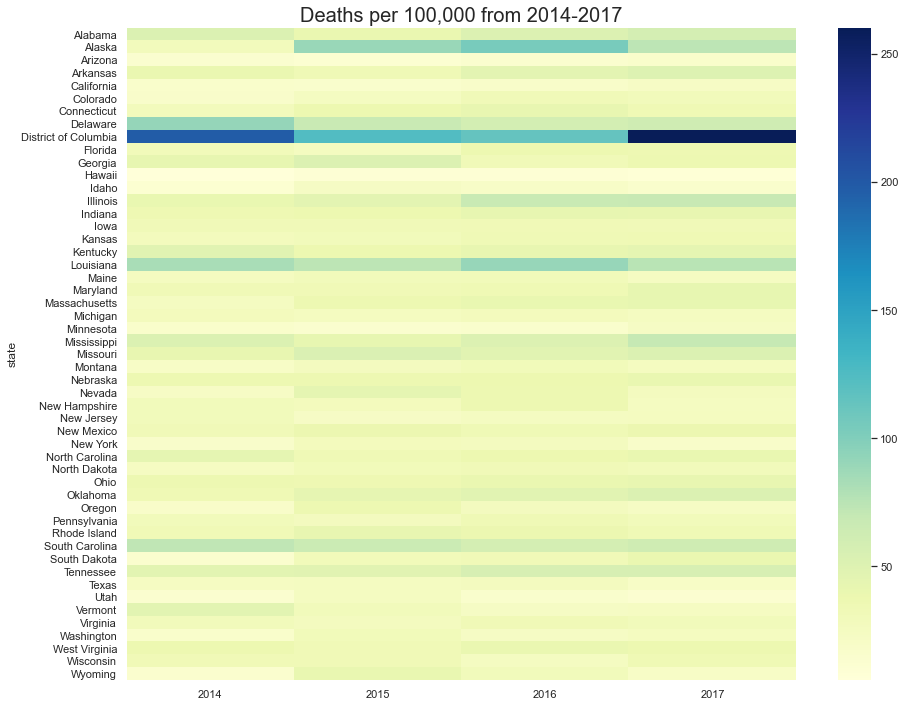

In [61]:
plt.subplots(figsize=(15,12))
sns.heatmap(c_years,cmap="YlGnBu");
plt.title("Deaths per 100,000 from 2014-2017", fontsize =20);

In [ ]:
#want to do above by month/year

In [ ]:
usa_map = folium.Map(location=[48, -102], zoom_start=3)
usa_map